In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import praw

user_agent = "Scrape 1.0 by Dono"
reddit = praw.Reddit(
    client_id ="Qt0RKr4jRmrky5cg0fuTwg",
    client_secret="bJENgeQl2nHWmTKFZDuS2PH5nEatIg",
    user_agent=user_agent
)

In [3]:
#hot new rising top
headlines = set()
for submission in reddit.subreddit("cryptocurrencynews").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

842


In [4]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Formula 1 Made Crypto.Com A Global Partner Of ...
1,Australians Lost 3x More to Scammers via Bank ...
2,"Great team, great company. At this stage of my..."
3,Anonymous Hacker Group Launches Anon Inu Crypt...
4,Bitcoin Price Bottomed Out Or More Sell-Off: O...


In [5]:
df.to_csv("headlines.csv", header=False, encoding="utf-8", index=False)

In [6]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/donovan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line) # -> dict
    pol_score["headline"] = line
    results.append(pol_score)
    
pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Formula 1 Made Crypto.Com A Global Partner Of F1 Sprint Series',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.3182,
  'headline': 'Australians Lost 3x More to Scammers via Bank Transactions than Bitcoin Payments in '
              '2020',
  'neg': 0.15,
  'neu': 0.85,
  'pos': 0.0},
 {'compound': 0.8481,
  'headline': 'Great team, great company. At this stage of my acquaintance with the project',
  'neg': 0.0,
  'neu': 0.573,
  'pos': 0.427}]


In [8]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Formula 1 Made Crypto.Com A Global Partner Of ...
1,0.150,0.850,0.000,-0.3182,Australians Lost 3x More to Scammers via Bank ...
2,0.000,0.573,0.427,0.8481,"Great team, great company. At this stage of my..."
3,0.191,0.809,0.000,-0.3818,Anonymous Hacker Group Launches Anon Inu Crypt...
4,0.000,1.000,0.000,0.0000,Bitcoin Price Bottomed Out Or More Sell-Off: O...


In [70]:
df["label"] = 0
df.loc[df["compound"] > 0.2, "label"] = 1
df.loc[df["compound"] < -0.2, "label"] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,0.715,0.285,0.4926,"How I relax after work, how do you relax?! (M)",1
1,0.371,0.629,0.000,-0.6486,He woke me up to fuck me…not complaining thoug...,-1
2,0.231,0.769,0.000,-0.0516,30 [m] leave you dripping?,0
3,0.107,0.687,0.206,0.3182,"Still a bit soft, help me get the last bit har...",1
4,0.000,1.000,0.000,0.0000,"You bring the (f)ucks, I’ll bring the cuddles 🤗",0


In [71]:
df2 = df[["headline", "label"]]

In [72]:
df2.to_csv("reddit_headlines_labels.csv", encoding="utf-8", index=False)

In [73]:
df.label.value_counts()

 0    474
 1    347
-1    142
Name: label, dtype: int64

In [74]:
df.label.value_counts(normalize=True) * 100

 0    49.221184
 1    36.033229
-1    14.745587
Name: label, dtype: float64

In [75]:
print("Positive headlines:\n")
pprint(list(df[df["label"] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df["label"] == -1].headline)[:5], width=200)

Positive headlines:

['How I relax after work, how do you relax?! (M)', 'Still a bit soft, help me get the last bit hard? [M]', 'Good morning 😘👅😏 (f)', 'A tasty treat (f)', 'Do you like having fun in plubic? (F)']

Negative headlines:

['He woke me up to fuck me…not complaining though 😈 [m] [f]',
 '28 [M] Your Cherry Bomb?',
 '(f)eeling lonely and horny 🙄',
 'Would you suck it? (M)',
 'Nothing feels as good as when you’re not allowed [f]']


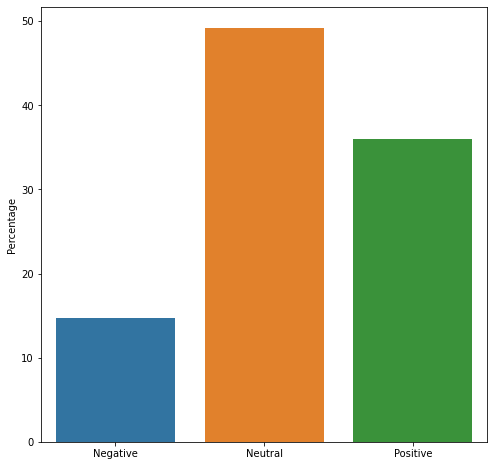

In [76]:
fig, ax = plt.subplots(figsize=(8,8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(["Negative", "Neutral", "Positive"])
ax.set_ylabel("Percentage")

plt.show()